Name: Amartya Sinha

Roll No: AC-1207

1. Consider the following data frame containing a family name, gender of the family member and her/his monthly income in each record.

        Name    Gender    MonthlyIncome (Rs.)

    1.  Shah    Male    114000.00
    2.  Vats    Male    65000.00
    3.  Vats    Female  43150.00
    4.  Kumar   Female  69500.00
    5.  Vats    Female  155000.00
    6.  Kumar   Male    103000.00
    7.  Shah    Male    55000.00
    8.  Shah    Female  112400.00
    9.  Kumar   Female  81030.00
    10. Vats    Male    71900.00

Write a program in Python using Pandas to performthe following:
1. Calculate and display familywise(on family name)gross monthly income.
2. Calculate and display the member with the highest monthly income in a family.
3. Calculate and display monthly income of all members with income greater than Rs. 60000.00.
4. Calculate and display the average monthly income of the female members in the Shah family.
5. Find the family name in which females average income is maximum.
6. Compare member count and average income for each family using appropriate plot.
7. Draw a pie chart for each family to show their income distribution gender wise

In [1]:
import numpy as np
import pandas as pd

In [3]:
q1_csv = pd.read_csv("ass_5_q1.csv")
q1_csv

,Name,Gender,MonthlyIncome (Rs.)
0,Shah,Male,114000.0
1,Vats,Male,65000.0
2,Vats,Female,43150.0
3,Kumar,Female,69500.0
4,Vats,Female,155000.0
5,Kumar,Male,103000.0
6,Shah,Male,55000.0
7,Shah,Female,112400.0
8,Kumar,Female,81030.0
9,Vats,Male,71900.0


In [9]:
# a)Calculate and display familywise(on family name)gross monthly income.
q1_csv.groupby("Name")["MonthlyIncome (Rs.)"].sum()

Name
Kumar    253530.0
Shah     281400.0
Vats     335050.0
Name: MonthlyIncome (Rs.), dtype: float64

In [23]:
# b)Calculate and display the member with the highest monthly income in a family.
q1_csv.groupby("Name").max()

,Gender,MonthlyIncome (Rs.)
Name,,
Kumar,Male,103000.0
Shah,Male,114000.0
Vats,Male,155000.0


In [79]:
# c)Calculate and display monthly income of all members with income greater than Rs. 60000.00.
q1_csv.loc[q1_csv["MonthlyIncome (Rs.)"]>60000.00]

,Name,Gender,MonthlyIncome (Rs.)
0,Shah,Male,114000.0
1,Vats,Male,65000.0
3,Kumar,Female,69500.0
4,Vats,Female,155000.0
5,Kumar,Male,103000.0
7,Shah,Female,112400.0
8,Kumar,Female,81030.0
9,Vats,Male,71900.0


In [41]:
# d)Calculate and display the average monthly income of the female members in the Shah family.
q1_csv[(q1_csv.Gender=="Female") & (q1_csv.Name == "Shah")]["MonthlyIncome (Rs.)"].mean()

112400.0

In [55]:
# e)Find the family name in which females average income is maximum.
q1_csv[(q1_csv.Gender=="Female")].groupby("Name")["MonthlyIncome (Rs.)"].mean().idxmax()

'Shah'

In [70]:
# f)Compare member count and average income for each family using appropriate plot.
mem_count = q1_csv.groupby("Name").count()["Gender"]
avg_income = q1_csv.groupby("Name")["MonthlyIncome (Rs.)"].mean()/10000

In [60]:
import matplotlib.pyplot as plt

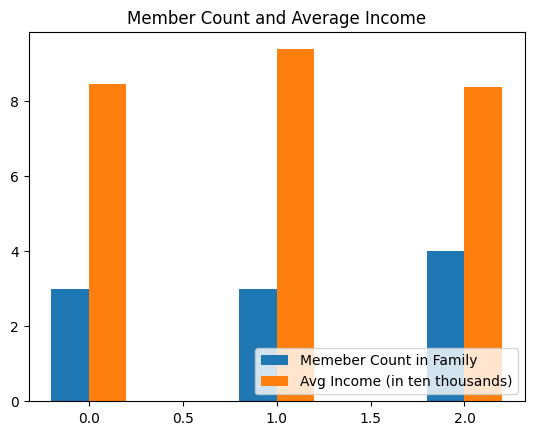

In [82]:
plt.bar(np.arange(len(mem_count))-0.1, mem_count, width=0.2, label="Memeber Count in Family")
plt.bar(np.arange(len(avg_income))+0.1, avg_income, width=0.2, label="Avg Income (in ten thousands)")
plt.legend(loc="lower right")
plt.title("Member Count and Average Income")
plt.show()

<AxesSubplot: ylabel='MonthlyIncome (Rs.)'>

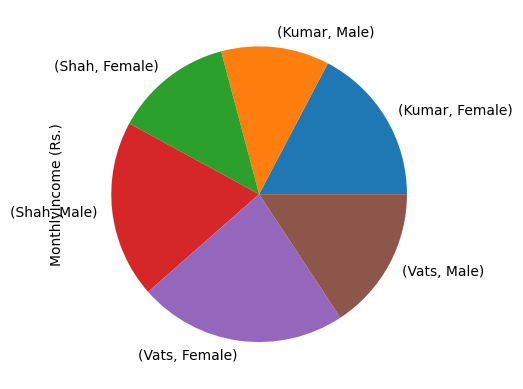

In [94]:
# g)Draw a pie chart for each family to show their income distribution gender wise.
pie_chart = q1_csv.groupby(['Name', 'Gender']).sum()
pie_chart['MonthlyIncome (Rs.)'].plot(kind='pie')

2. Use tips data to do the following: see appropriate parameters for figs/plots

    1. Compare average tipspaid by smoker and non-smokers on weekdays and weekends individually using bar plot
    2. compare the distribution of bill amountof bills paid on weekday and week end
    3. Identify outlier in the bill amount of females customers (explicitly mention the formula used to detect outliers) and show using appropriate plot.
    4. Find the size of customers who have paid maximum tip on weekend.
    5. Compare the average amount of bill paid by females and males customers on all days (using line plot, xaxis has four tics corresponding to day)

In [83]:
import seaborn as sns

In [84]:
tips_data = sns.load_dataset("tips")

In [85]:
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [86]:
# a)Compare average tipspaid by smoker and non-smokers on weekdays and weekends individually using bar plot
weekend_days = tips_data["day"].isin(["Sat", "Sun"])

tips_data['weekend'] = weekend_days

<AxesSubplot: xlabel='weekend,smoker'>

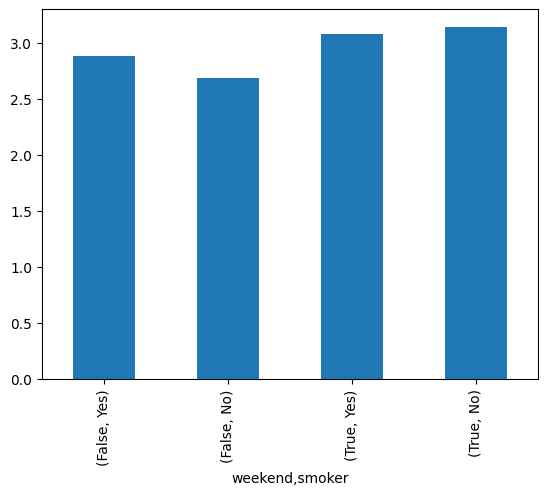

In [90]:
comp_data = tips_data.groupby(['weekend', 'smoker'])['tip'].mean()

comp_data.plot.bar()

<AxesSubplot: xlabel='day', ylabel='total_bill'>

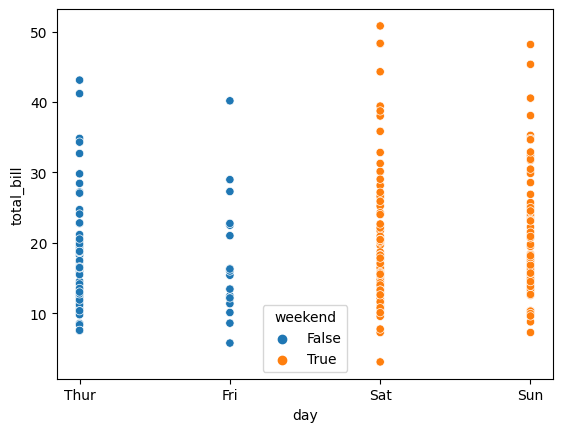

In [93]:
# b)compare the distribution of bill amount of bills paid on weekday and week end.
sns.scatterplot(data=tips_data, x='day', y='total_bill', hue='weekend')

In [95]:
# c)Identify outlier in the bill amount of females customers (explicitly mention the formula used to detect outliers) and show using appropriate plot
female_customers = tips_data['total_bill'][tips_data['sex']=='Female'].to_frame(name='total_bill')

In [103]:
quant1 = female_customers['total_bill'].quantile(0.25)
quant2 = female_customers['total_bill'].quantile(0.5)
quant3 = female_customers['total_bill'].quantile(0.75)
print(quant1, quant2, quant3)                               # calculate and print quantiles

12.75 16.4 21.520000000000003


In [99]:
female_customers['total_bill'].describe()

count    87.000000
mean     18.056897
std       8.009209
min       3.070000
25%      12.750000
50%      16.400000
75%      21.520000
max      44.300000
Name: total_bill, dtype: float64

In [100]:
IQR = quant3 - quant1
low_val = quant1 - 1.5*IQR
max_val = quant3 + 1.5*IQR
print(low_val, max_val)             # calculating and printing low val and max val for outliers

-0.4050000000000047 34.67500000000001


In [105]:
female_customers[(female_customers['total_bill']>max_val)|(female_customers['total_bill']<low_val)]   # combined outliers

,total_bill
11,35.26
52,34.81
85,34.83
102,44.30
197,43.11
238,35.83


<AxesSubplot: ylabel='total_bill'>

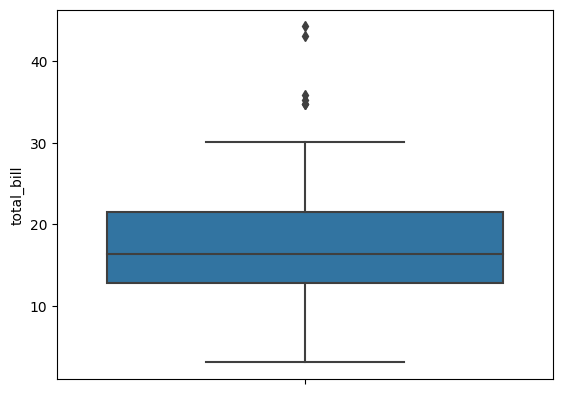

In [106]:
sns.boxplot(y=female_customers['total_bill'])

In [107]:
# d)Find the size of customers who have paid maximum tip on weekend
max_val = tips_data[tips_data['weekend']==True]['tip'].max()
max_val

10.0

In [108]:
tips_data[tips_data['tip']==max_val]['size'].sum()

3

In [ ]:
# e)Compare the average amount of bill paid by females and males customers on all days (using line plot, xaxis has four tics corresponding to day)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

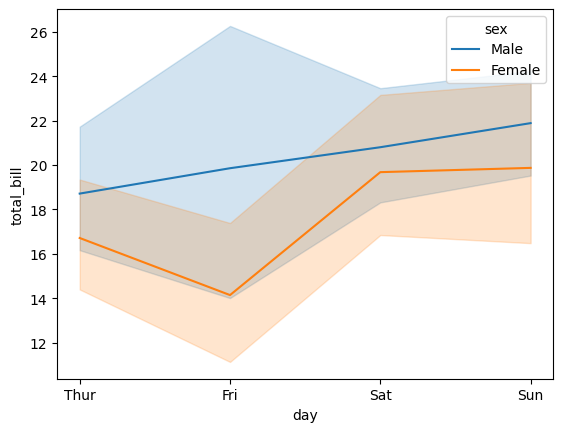

In [110]:
sns.lineplot(x='day', y='total_bill', hue='sex', data=tips_data)